In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import time
import datetime
from utils import *
from data_processing import *
today = datetime.date.today()
input_url = "input/dataset.csv"
files_train = [101,103]
files_test = [201,203]

In [2]:
def read_cmapss(input_url):
    df = pd.read_csv("input/dataset.csv", header=None)
    columns_old = ["ENGINEID", "TIMECYCLE", "OPSET1", "OPSET2", "OPSET3", "Total temp at fan in (T2)", "Total temp at LPC out (T24)", "Total temp at HPC out (T30)", "Total temp at LPT out (T50)", 
"Pres at fan in (P2)", "Total pres in bypass-duct (P15)", "Total pres at HPC out (P30)", "Physical fan speed (Nf)", 
"Physical core speed (Nc)", "Engine pres ratio (epr=P50/P2)", "Static pres at HPC out (Ps30)", "Ratio of fuel flow to Ps30 (phi)",
"Corrected fan speed (NRf)", "Corrected core speed (NRc)", "Bypass Ratio (BPR)", "Burner fuel-air ratio (farB)", 
"Bleed Enthalpy (htBleed)", "Demanded fan speed (Nf_dmd)", "Demanded corrected fan speed (PCNfR_dmd)", "HPT coolant bleed (W31)",
"LPT coolant bleed (W32)", "FILEID","RUL"]
    columns_new = ["FILEID","ENGINEID", "TIMECYCLE", "OPSET1", "OPSET2", "OPSET3", "Total temp at fan in (T2)", "Total temp at LPC out (T24)", "Total temp at HPC out (T30)", "Total temp at LPT out (T50)", 
"Pres at fan in (P2)", "Total pres in bypass-duct (P15)", "Total pres at HPC out (P30)", "Physical fan speed (Nf)", 
"Physical core speed (Nc)", "Engine pres ratio (epr=P50/P2)", "Static pres at HPC out (Ps30)", "Ratio of fuel flow to Ps30 (phi)",
"Corrected fan speed (NRf)", "Corrected core speed (NRc)", "Bypass Ratio (BPR)", "Burner fuel-air ratio (farB)", 
"Bleed Enthalpy (htBleed)", "Demanded fan speed (Nf_dmd)", "Demanded corrected fan speed (PCNfR_dmd)", "HPT coolant bleed (W31)",
"LPT coolant bleed (W32)", "RUL"]
    df.columns = columns_old
    df = df[columns_new]

    return df
    

In [3]:
df = read_cmapss(input_url)
df.head()

,FILEID,ENGINEID,TIMECYCLE,OPSET1,OPSET2,OPSET3,Total temp at fan in (T2),Total temp at LPC out (T24),Total temp at HPC out (T30),Total temp at LPT out (T50),...,Corrected fan speed (NRf),Corrected core speed (NRc),Bypass Ratio (BPR),Burner fuel-air ratio (farB),Bleed Enthalpy (htBleed),Demanded fan speed (Nf_dmd),Demanded corrected fan speed (PCNfR_dmd),HPT coolant bleed (W31),LPT coolant bleed (W32),RUL
0,101,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,120
1,101,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,120
2,101,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,120
3,101,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,120
4,101,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,120


In [4]:
feat_names = df.columns.values[3:-1]
target_name = df.columns.values[-1]
df[feat_names] = data_norm(df[feat_names])

In [5]:
df[df["TIMECYCLE"]==1]["RUL"].value_counts()
(df["FILEID"]*1000+df["ENGINEID"]).value_counts()
print("EDA")

EDA


In [6]:
test = df.loc[df["FILEID"].isin(files_test)]
train = df.loc[df["FILEID"].isin(files_train)]

In [7]:
print("df.shape: %s, train.shape: %s, test.shape: %s" % (str(df.shape), str(train.shape), str(test.shape)))

df.shape: (265256, 28), train.shape: (45351, 28), test.shape: (29692, 28)


# Analysis of test data series length

In [8]:
short_cycles = test.groupby(["FILEID", "ENGINEID"])["TIMECYCLE"].count().reset_index().sort_values("TIMECYCLE")
out = pd.DataFrame()
for i in range(len(short_cycles)):
    ds = test.loc[(test["FILEID"]==int(short_cycles["FILEID"][i:i+1])) & (test["ENGINEID"]==int(short_cycles["ENGINEID"][i:i+1]))]
    out = out.append(ds.iloc[-1:,:])

In [9]:
out[["FILEID", "ENGINEID", "TIMECYCLE","RUL"]].head(11)

,FILEID,ENGINEID,TIMECYCLE,RUL
20661,201,1,31,112
31672,201,85,34,118
25505,201,39,37,120
154528,203,52,38,120
23252,201,22,39,111
160269,203,88,41,120
22259,201,14,46,107
152288,203,37,47,120
23616,201,25,48,120
20710,201,2,49,98


Short series are usually provided for healthy engines

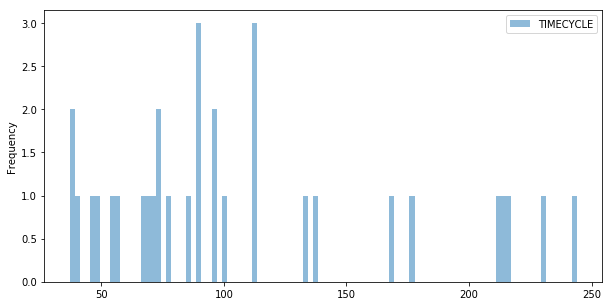

In [10]:
hist = out.loc[out["RUL"]==120][["TIMECYCLE"]].plot.hist(bins=100, alpha=0.5, figsize=(10,5))

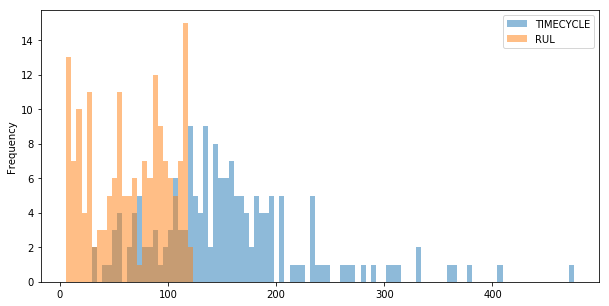

In [11]:
hist = out.loc[out["RUL"]<120][["TIMECYCLE","RUL"]].plot.hist(bins=100, alpha=0.5, figsize=(10,5))

## Comparing 2 data sets

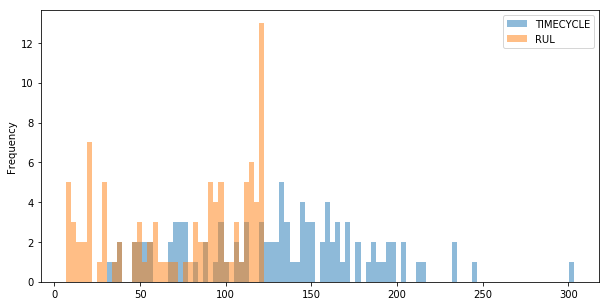

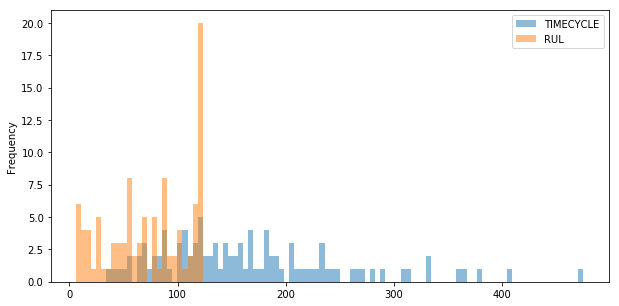

In [12]:
for file in files_test:
    out.loc[(out["RUL"]<=120) & (out["FILEID"]==file)][["TIMECYCLE", "RUL"]].plot.hist(bins=100, alpha=0.5, figsize=(10,5))

# Sensor data analysis for train data

In [13]:
train["REV_TIMECYCLE"] = train.groupby(["FILEID", "ENGINEID"])["TIMECYCLE"].transform(lambda x: max(x)-x)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
mean_train = train.groupby(["FILEID", "REV_TIMECYCLE"]).agg(np.mean).reset_index()
std_train = train.groupby(["FILEID", "REV_TIMECYCLE"]).agg(np.std).reset_index()

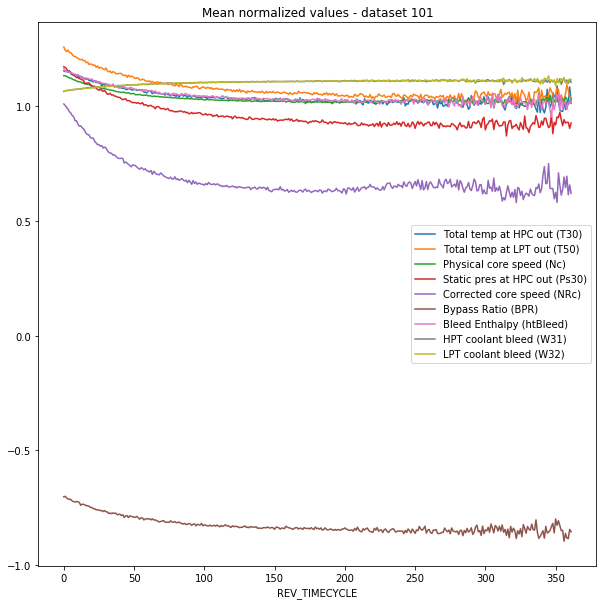

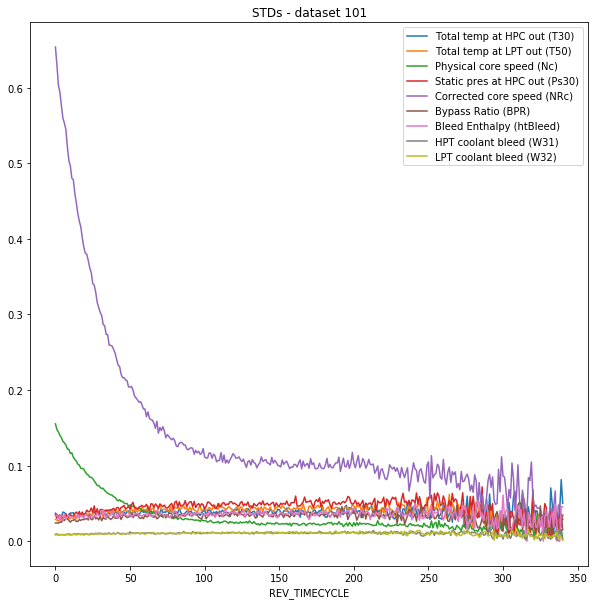

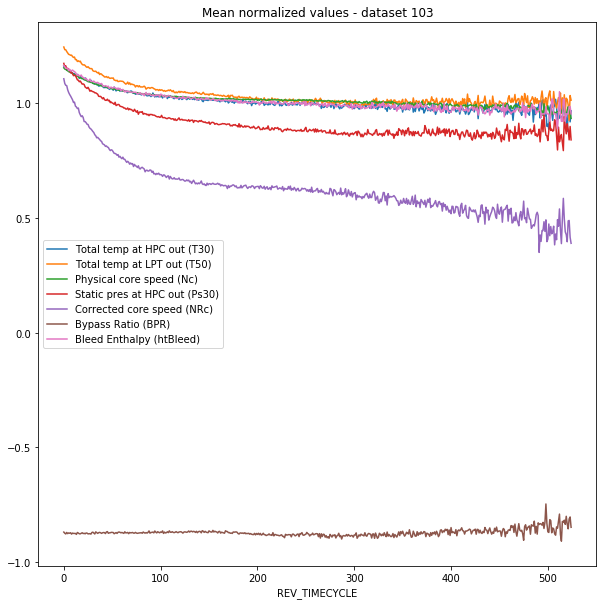

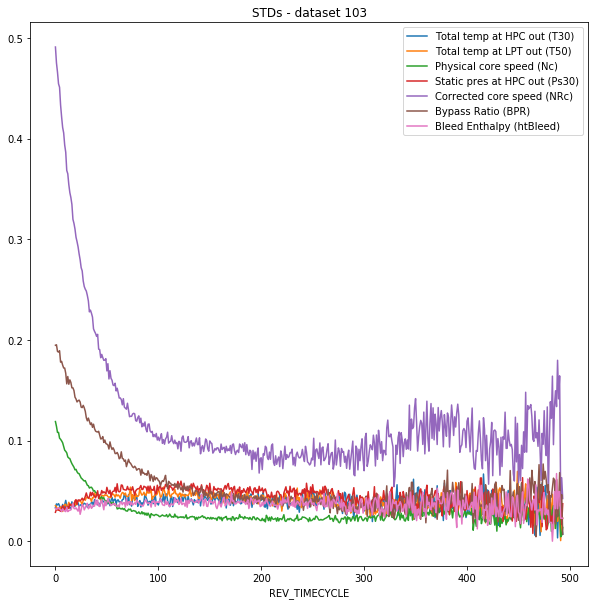

In [15]:
for file in files_train:
    f1 = mean_train[mean_train["FILEID"]==file]
    f2 = std_train[std_train["FILEID"]==file]
    cols = (f1.std()>0.01)
    f1 = f1.loc[:,cols]
    f2 = f2.loc[:,cols]
    f1.plot(x='REV_TIMECYCLE', y=f1.columns.values[3:-1], figsize=(10,10), title = "Mean normalized values - dataset "+str(file)) 
    f2.plot(x='REV_TIMECYCLE', y=f2.columns.values[3:-1], figsize=(10,10), title = "STDs - dataset "+str(file)) 

In [16]:
select_feat = ["Total temp at HPC out (T30)", 
               "Total temp at LPT out (T50)", 
               "Physical core speed (Nc)", 
               "Static pres at HPC out (Ps30)", 
               "Corrected core speed (NRc)", 
               "Bypass Ratio (BPR)", 
               "Bleed Enthalpy (htBleed)"]

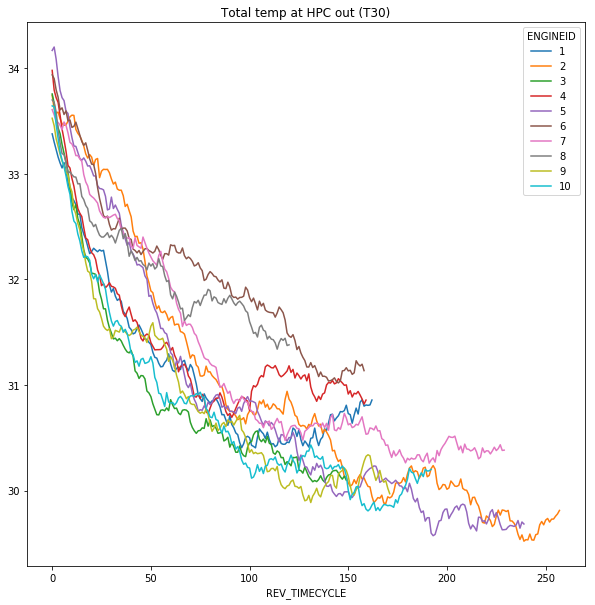

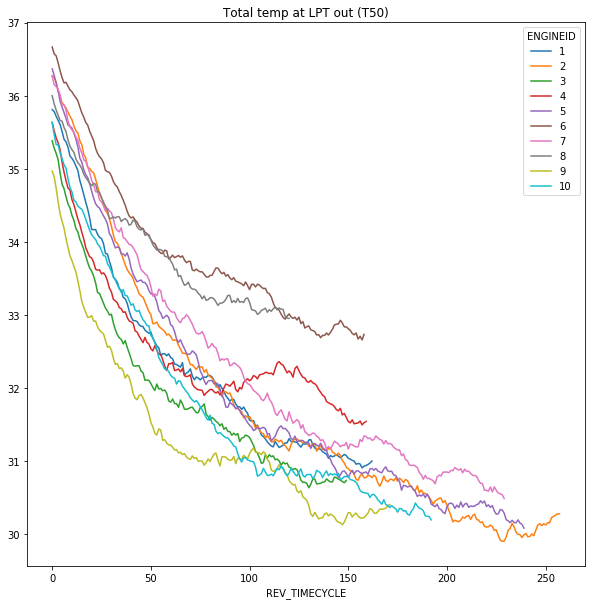

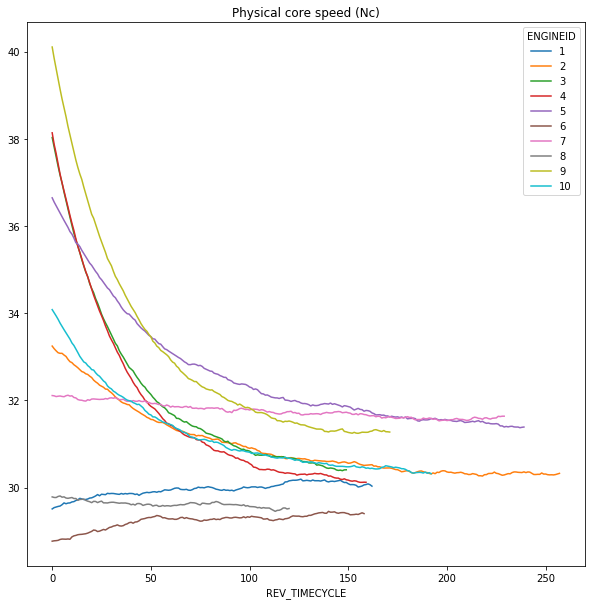

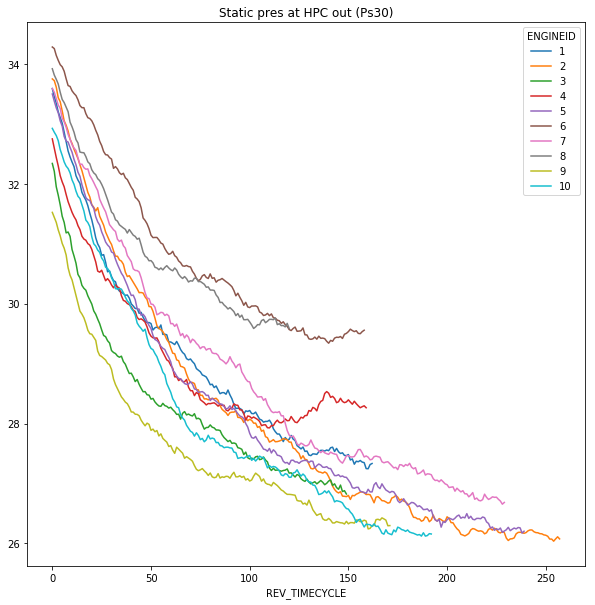

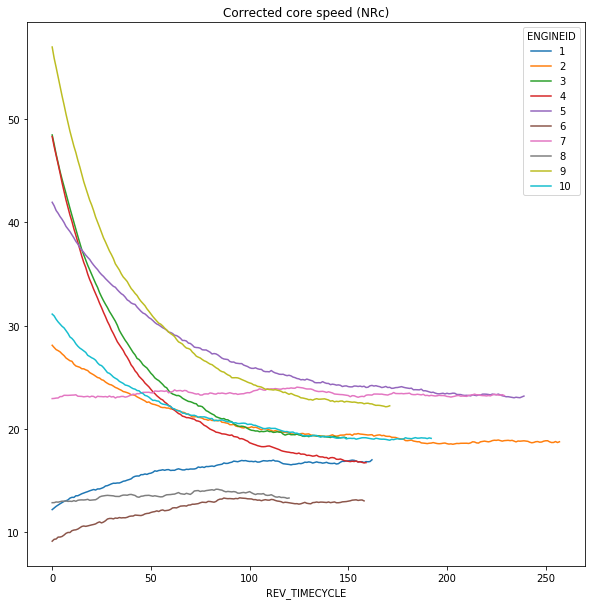

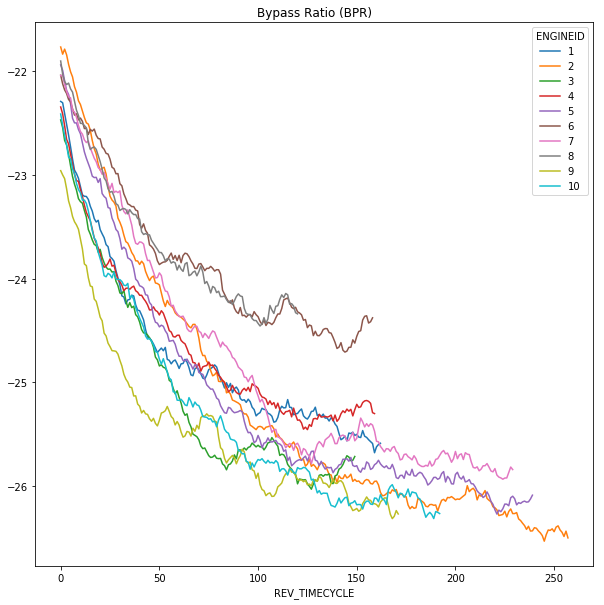

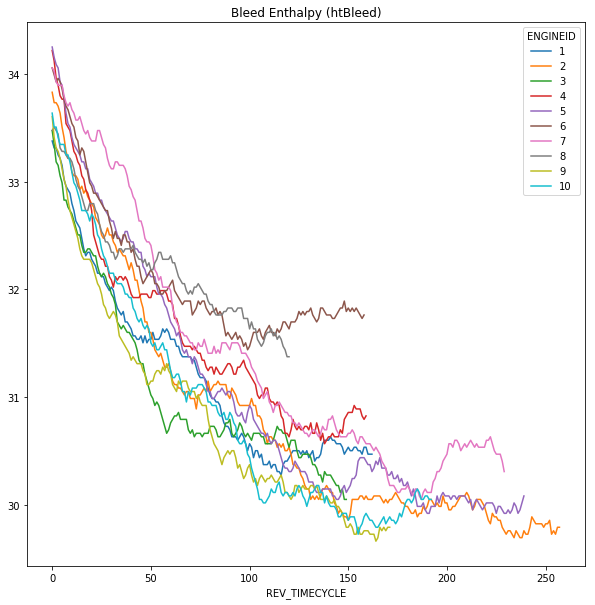

In [17]:
df = train.loc[train.FILEID==101,["ENGINEID", "TIMECYCLE","REV_TIMECYCLE","RUL"] + select_feat]
f = df.columns.values[4:]
win = 30
df[f] = df.groupby("ENGINEID").transform(lambda x: x.rolling(win, min_periods=1).sum())[f]
df = df.groupby("ENGINEID").apply(lambda x:x.iloc[win-1:,:]).reset_index(drop=True)
for col in f:
    df1 = df.pivot(index="REV_TIMECYCLE", columns="ENGINEID", values= col)
    df1.iloc[:,:10].plot(figsize=(10,10), title=col)
